Project HRV fatigue.

In [2]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read(file):
    '''
    read a .hea file and convert it to a dataframe
    '''
    w=wfdb.rdsamp(file)
    return(pd.DataFrame(data=w[0],columns=w[1]['sig_name']) )

In [4]:
w=wfdb.rdsamp('s1_walk')

In [5]:
w

(array([[ 2.61644961e+02,  1.63149687e+03, -2.22003527e+01, ...,
          2.20035480e-01, -7.43100826e-01,  5.79993046e+01],
        [ 4.29621808e+02,  1.65275032e+03, -2.26414473e+01, ...,
          2.21803607e-01, -7.20108082e-01,  5.80029666e+01],
        [ 5.09405921e+02,  1.66373070e+03, -2.29411384e+01, ...,
          2.09409957e-01, -7.64006933e-01,  5.80066285e+01],
        ...,
        [-2.11845073e+01,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 1.75994368e+00,             nan,             nan, ...,
                     nan,             nan,             nan],
        [ 3.91098596e+00,             nan,             nan, ...,
                     nan,             nan,             nan]]),
 {'fs': 256,
  'sig_len': 150529,
  'n_sig': 15,
  'base_date': None,
  'base_time': None,
  'units': ['mV',
   'mV',
   'degs^-1',
   'degs^-1',
   'degs^-1',
   'ms^-2',
   'ms^-2',
   'ms^-2',
   'ms^-2',
   'ms^-2',
   'ms^-2

In [6]:
df=read('s1_walk')

In [311]:
df.corr()

,chest_ecg,wrist_ppg,wrist_gyro_x,wrist_gyro_y,wrist_gyro_z,wrist_low_noise_accelerometer_x,wrist_low_noise_accelerometer_y,wrist_low_noise_accelerometer_z,wrist_wide_range_accelerometer_x,wrist_wide_range_accelerometer_y,wrist_wide_range_accelerometer_z,wrist_mag_x,wrist_mag_y,wrist_mag_z,sample_times_for_all_signals_apart_from_ecg
chest_ecg,1.000000,-0.033647,0.054434,0.046860,-0.079370,-0.030612,0.039849,-0.050761,-0.030152,0.039544,-0.051274,-0.004818,0.020533,0.030706,0.001256
wrist_ppg,-0.033647,1.000000,-0.311575,0.029851,0.306969,-0.102491,0.203811,0.281101,-0.076528,0.200172,0.290086,0.146146,-0.060427,-0.159172,0.002448
wrist_gyro_x,0.054434,-0.311575,1.000000,-0.252842,-0.762851,-0.219983,0.222973,-0.554679,-0.205758,0.219882,-0.553145,0.188665,0.136546,-0.026256,-0.001531
wrist_gyro_y,0.046860,0.029851,-0.252842,1.000000,-0.176278,0.101770,0.018991,-0.143404,0.112134,0.021374,-0.130800,-0.084790,-0.099819,0.055248,-0.005789
wrist_gyro_z,-0.079370,0.306969,-0.762851,-0.176278,1.000000,0.163685,-0.366129,0.461689,0.157671,-0.361324,0.460643,0.048072,0.023765,-0.065042,0.002183
wrist_low_noise_accelerometer_x,-0.030612,-0.102491,-0.219983,0.101770,0.163685,1.000000,-0.370820,-0.048982,0.994765,-0.367672,-0.034879,0.107530,-0.251829,-0.165333,-0.040168
wrist_low_noise_accelerometer_y,0.039849,0.203811,0.222973,0.018991,-0.366129,-0.370820,1.000000,0.021939,-0.383266,0.998310,0.011059,-0.399784,0.079463,0.378905,-0.000215
wrist_low_noise_accelerometer_z,-0.050761,0.281101,-0.554679,-0.143404,0.461689,-0.048982,0.021939,1.000000,-0.055613,0.018454,0.997397,-0.238846,-0.272232,-0.124691,0.005373
wrist_wide_range_accelerometer_x,-0.030152,-0.076528,-0.205758,0.112134,0.157671,0.994765,-0.383266,-0.055613,1.000000,-0.382669,-0.039534,0.147484,-0.265899,-0.204752,-0.040215
wrist_wide_range_accelerometer_y,0.039544,0.200172,0.219882,0.021374,-0.361324,-0.367672,0.998310,0.018454,-0.382669,1.000000,0.007516,-0.404623,0.081025,0.383051,-0.000141


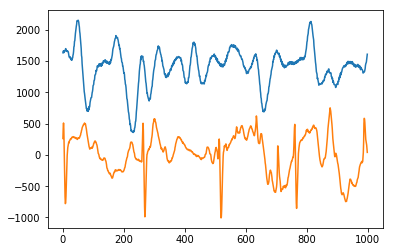

In [312]:
plt.plot(df['wrist_ppg'][:1000])
plt.plot(df['chest_ecg'][:1000])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=df.dropna(axis=0)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


## Correlation

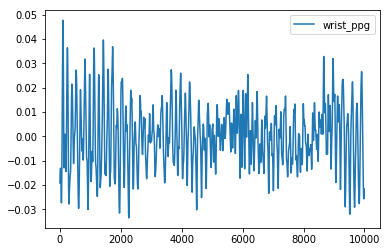

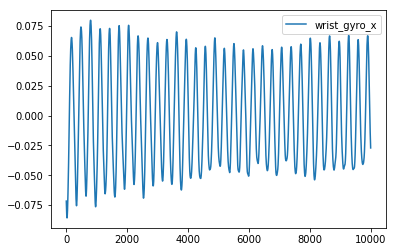

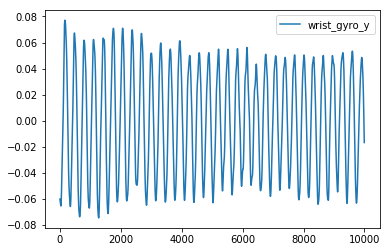

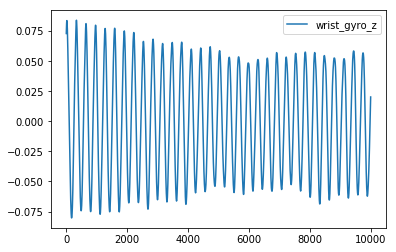

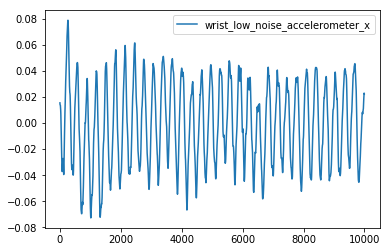

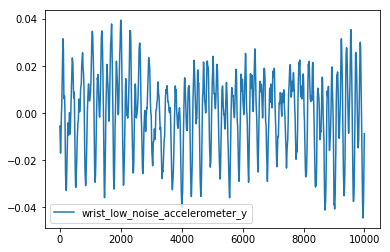

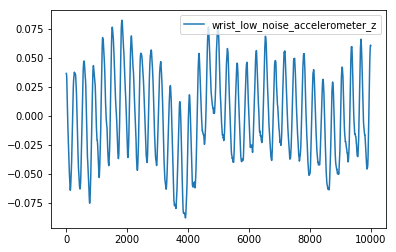

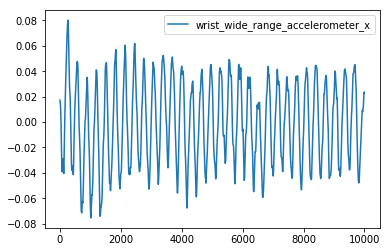

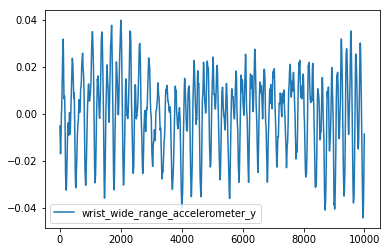

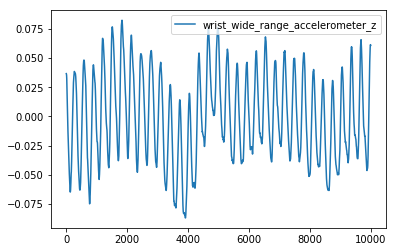

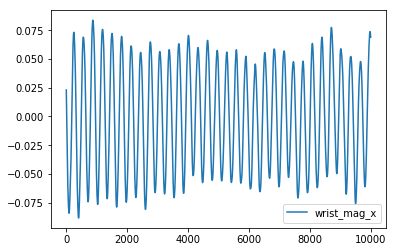

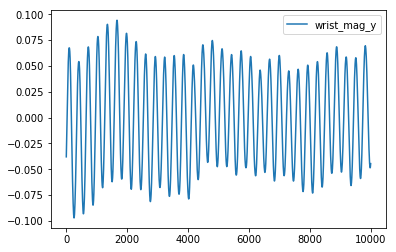

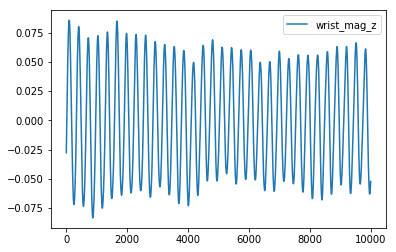

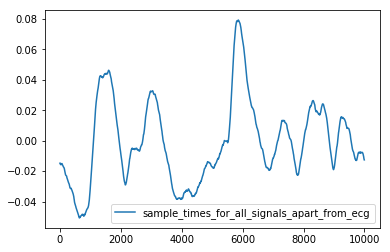

In [22]:
for j in df_scaled.columns[1:]:
    plt.plot([5*i for i in range(2000)],[df_scaled.iloc[:,0].corr(df_scaled[j].shift(5*i)) for i in range(2000)], label=j)
    plt.legend()
    plt.show()


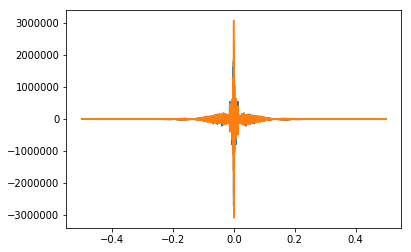

<Figure size 3600x3600 with 0 Axes>

In [8]:
import numpy as np

sp = np.fft.fft(df['chest_ecg'])
freq = np.fft.fftfreq(df.shape[0])
plt.plot(freq, sp.real, freq, sp.imag)
plt.figure(figsize=(50,50))

plt.show()

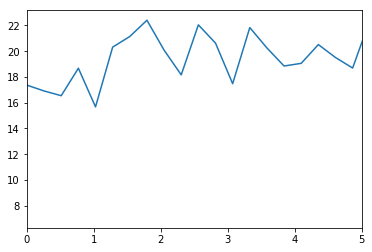

(0, 1000)

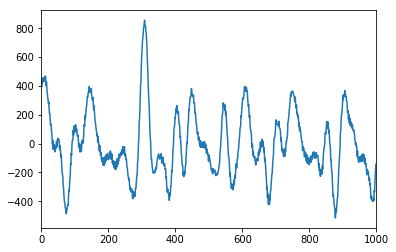

In [13]:



ps = np.abs(np.fft.fft(y))**2

time_step = 1/256 
freqs = np.fft.fftfreq(y.size, time_step)
idx = np.argsort(freqs)
plt.xlim([0,5])
plt.plot(freqs[idx], np.log(ps[idx]))
plt.show()
#plt.semilogy(freqs[idx], ps[idx])
plt.plot(y)
plt.xlim([0,1000])

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend,find_peaks
y=df['wrist_ppg'].dropna()-(df['wrist_ppg'].dropna()).mean()
y=detrend(y)

## peaks detection by a sliding window

In [163]:
def Max(arr, k): 
    maxx = -1
    n=len(arr)
    peaks=[]
    
    for i in range(n - k + 1): 
        maxx = i 
        for j in range(1, k): 
            if arr[i+j] > arr[maxx]: 
                maxx = i + j
       
        if len(peaks)==0 or abs(maxx-peaks[-1])>20:
            peaks.append(maxx)
        
    return(peaks)

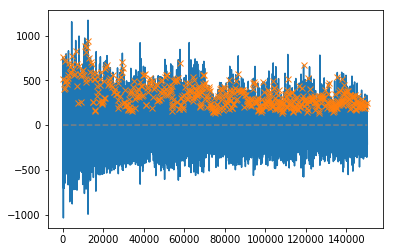

In [164]:
peaks=np.array(Max(y,400))
plt.plot(y)

plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()

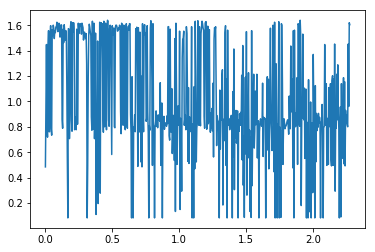

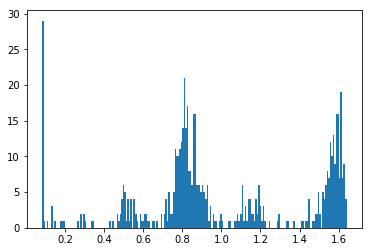

In [165]:
distance=peaks[1:]-peaks[:-1]
plt.plot(np.arange(len(distance))/256, distance/256)
plt.show()
plt.hist(distance/256, bins=200)
plt.show()

## peaks detection by python library

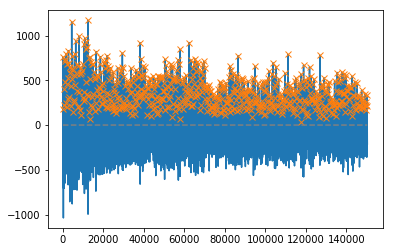

In [230]:
from scipy.signal import detrend,find_peaks
peaks, _ = find_peaks(y,distance=160,prominence=1, width=15)
plt.plot(y)
plt.plot(peaks, y[peaks], "x")
plt.plot(np.zeros_like(y), "--", color="gray")
plt.show()


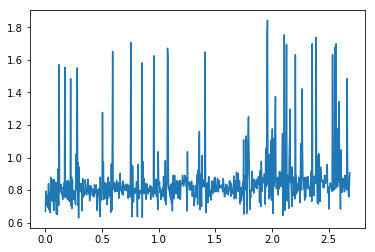

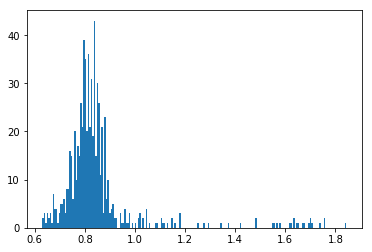

In [251]:
distance=peaks[1:]-peaks[:-1]
w=1
distance=pd.DataFrame(distance).rolling(w).mean()[w:].values.reshape(1,-1)[0]
plt.plot(np.arange(len(distance))/256, distance/256)
plt.show()
plt.hist(distance/256, bins=200)
plt.show()

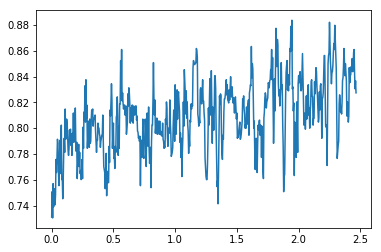

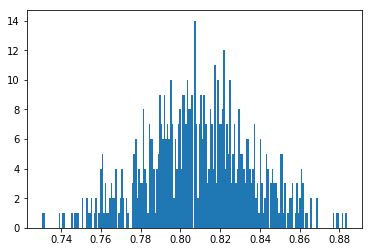

In [255]:
distance=peaks[1:]-peaks[:-1]

distance= np.array([x for x in distance if x <= 256])

w=5
distance=pd.DataFrame(distance).rolling(w).mean()[w:].values.reshape(1,-1)[0]

plt.plot(np.arange(len(distance))/256, distance/256)
plt.show()
plt.hist(distance/256, bins=200)
plt.show()

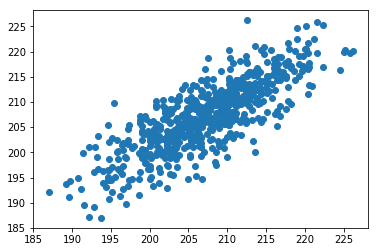

In [256]:
plt.scatter(distance[1:], distance[:-1])

# TFT

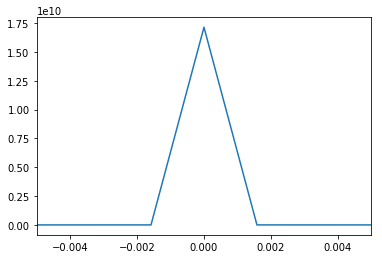

In [259]:
ps = np.abs(np.fft.fft(distance))**2

time_step = 1 
freqs = np.fft.fftfreq(distance.size, time_step)
idx = np.argsort(freqs)
plt.xlim([-0.005,0.005])
plt.plot(freqs[idx], ps[idx])